# WORDCLOUD

In [1]:
import PyPDF2
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

#installed 10_05_21 in main env
#conda install -c conda-forge wordcloud

In [2]:
#working pdfFile - string returns string s1
def extractPDFtoString(pdfFile,folderName):
    pdf_file = open("./"+folderName+"/"+pdfFile,'rb')
    read_pdf = PyPDF2.PdfFileReader(pdf_file)
    numPages = read_pdf.getNumPages()
    s1=""
    for i in range(numPages):
        page = read_pdf.getPage(i)
        pageco = page.extractText()
        s1+=pageco        
    return s1

In [3]:
stopwords = set()

for i, line in enumerate(open('stopwords1.txt', encoding="utf-8")):
        line = line.strip()
        stopwords.add(line)
        
print('Stopwords loaded!')

# to add stopwords: stopwords.add('')

Stopwords loaded!


In [4]:
#the backgroung has to be white

portugal_mask = np.array(Image.open('ofPortugal1.png'))
    
print('Image loaded!')

Image loaded!


## GC22

In [5]:
gc22Files = [x for x in os.listdir("./gc22") if x.endswith(".pdf")]
#pdfFiles

In [6]:
gc22_speech=""
for i in gc22Files:
    gc22_speech+=(extractPDFtoString(i,"gc22"))

In [7]:
#teste3 = all_speech
gc22Words = gc22_speech.replace("\n \n \n", " ").replace("\n \n", " ").replace("\n", "")

In [8]:
# instantiate a word cloud object
gc22Cloud = WordCloud(
    background_color='white',
    max_words=1000,
    stopwords=stopwords
)

# generate the word cloud
gc22Cloud.generate(gc22Words)

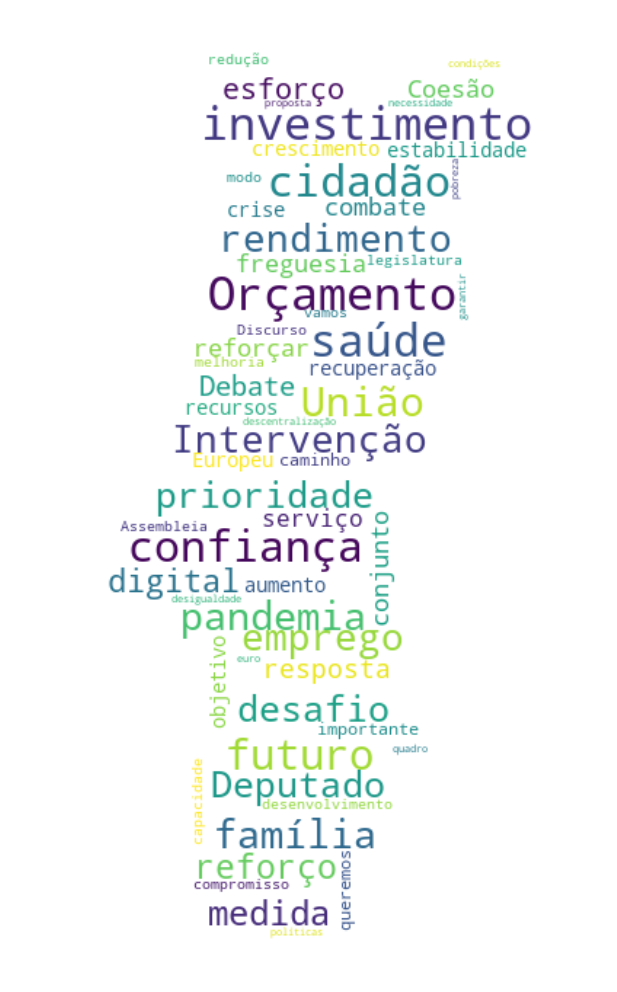

In [9]:
# instantiate a word cloud object
gc22Cloud = WordCloud(background_color='white', max_words=1000, mask=portugal_mask, stopwords=stopwords)

# generate the word cloud
gc22Cloud.generate(gc22Words)

# display the word cloud
figGc22 = plt.figure()
figGc22.set_figwidth(14) # set width
figGc22.set_figheight(18) # set height

plt.imshow(gc22Cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [10]:
#save cloud

#gc22Cloud.to_file('gc22Cloud.png')

# Rio

In [11]:
rioFiles = [x for x in os.listdir("./rio") if x.endswith(".pdf")]
#print(pdfFiles3)

In [12]:
rio_speech=""
for i in rioFiles:
    rio_speech+=(extractPDFtoString(i,"rio"))

In [13]:
#rio_speech
#temp2 = rio_speech
rioWords = rio_speech.replace("\n\n", "").replace("\n-", "").replace("\n","").replace("ﬁ", "").replace("ﬂ", "")

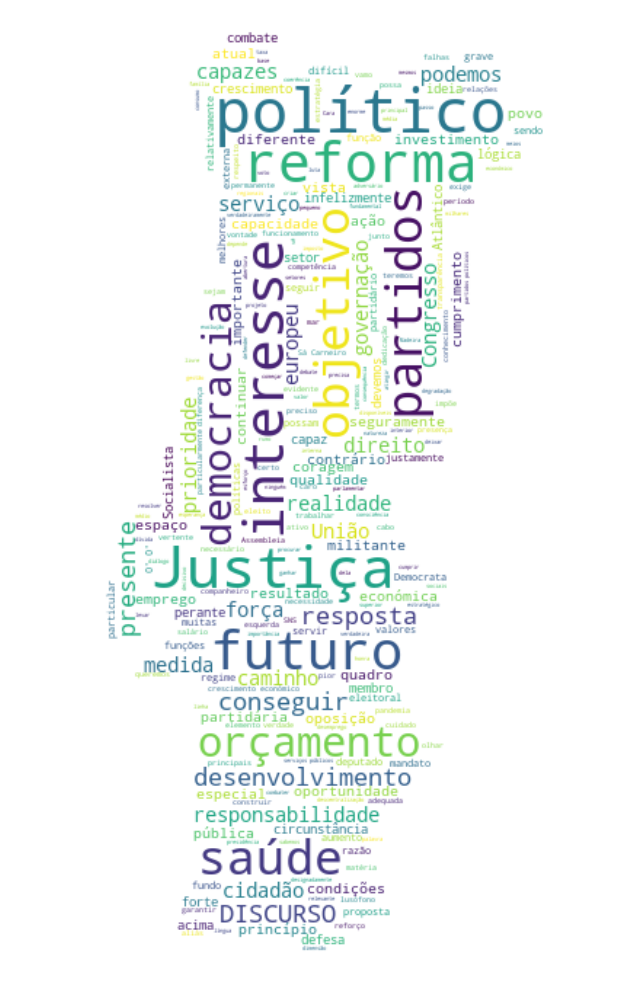

In [14]:
# instantiate a word cloud object
rioCloud = WordCloud(background_color='white', max_words=1000, mask=portugal_mask, stopwords=stopwords)

# generate the word cloud
rioCloud.generate(rioWords)

# display the word cloud
figRio = plt.figure()
figRio.set_figwidth(14) # set width
figRio.set_figheight(18) # set height

plt.imshow(rioCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:
#rioCloud.to_file('rioCloud.png')

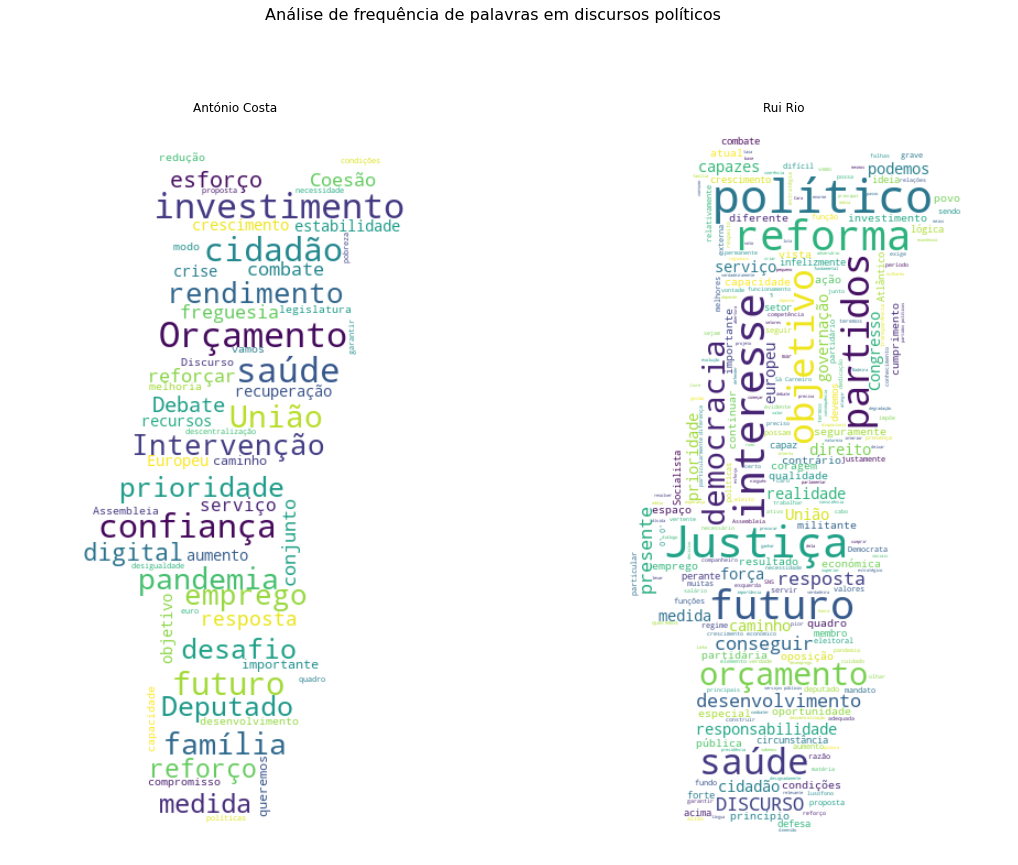

In [16]:
fig=plt.figure()
fig.set_figheight(14)
fig.set_figwidth(18)
fig.suptitle('Análise de frequência de palavras em discursos políticos', fontsize=16)

ax_1=fig.add_subplot(121)
ax_1.imshow(gc22Cloud, interpolation='bilinear')
ax_1.axis('off')
ax_1.title.set_text('António Costa')

ax_2=fig.add_subplot(122)
ax_2.imshow(rioCloud, interpolation='bilinear')
ax_2.axis('off')
ax_2.title.set_text('Rui Rio')

#fig.suptitle("Figure with multiple Subplots")
plt.show()

In [18]:
#fig.savefig('foo.png')